<div style="padding:20px;color:#DEB078;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#990012;overflow:hidden;font-weight:800">🍷 Wine Quality 🍷</div>



* This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
* The dataset describes the amount of various chemicals present in wine and their effect on it's quality. 
* The datasets can be viewed as classification or regression tasks. 
* The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
* Our task is to predict the quality of wine using the given data.

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>1 | Content Overview</div></b>

<b>1 | Content Overview</b>
 
<b>2 | Libraries and Dataset Setup</b>
 
   * 2.1 Import Libraries
   * 2.2 Configure Properties
   * 2.3 Import Data

<b>3 | Structure Investigation</b>
 
   * 3.1 Structure Size
   * 3.2 Differences in structure
   * 3.3 Checking Id Column
   * 3.4 Datatypes Available
   * 3.5 Features Descriptions   
    
<b>4 | Dataframe Content Inspection</b>
 
   * 4.1 Null Values Check
   * 4.2 Unique Values Check
   * 4.3 Value Behaviour

<b>5 | Target Variable Analysis</b>
 
   * 5.1 For Original Data
   * 5.2 For Training Data
    
<b>6 | Univariate Analysis</b>
 
   * 6.1 Summary for Columns (Describe)
   * 6.2 Individual Column Shape
   * 6.3 Individual Column Value Observation (Outlier using IQR)
    
<b>7 | Combining Data and Relationship matrix</b>
 
   * 7.1 Combining Original and Training Data
   * 7.2 Creating Relation Matrix and Graph For Combined Training Data
   * 7.3 Creating Relation Matrix and Graph For Test Data
    
<b>8 | Multivariate Analysis wrt Quality</b>
 
   * 8.1 Relation with Quality in terms of corr coeficient (Combined Training and Org Data)
   * 8.2 Relation with Quality using pairplot (Combined Training and Org Data)
   * 8.3 Relation with Quality using boxplot (Combined Training and Org Data)
 
<b>9 | Multivariate Analysis leaving Quality</b>
 
   * 9.1 Other Interesting Relationships For Training Data (Original & Training Data Combined)
   * 9.2 Other Interesting Relationships For Test Data
 
<b>10 | Analysis So Far</b>
 
<b>11 | Feature Engineering and Modelling</b>

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>2  |  Libraries & Dataset Setup</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#990012'> Import Libraries</span></b>  

In [1]:
from IPython.display import clear_output
!pip install plotly --upgrade
clear_output()

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#990012'> Configure Properties</span></b>  

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), height=500, width=1000))
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#990012'> Import Data</span></b>  

df_original=pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
df_train=pd.read_csv("/kaggle/input/playground-series-s3e5/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s3e5/test.csv")

In [ ]:
df_original=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/winequality-red.csv")
df_train=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/train.csv")
df_test=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/test.csv")

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>3  |  Inspecting Dataframe Structure</div></b>

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#990012'> Structure Size</span></b>  

In [5]:
df_original.shape

(1143, 13)

In [6]:
df_train.shape

(2056, 13)

In [7]:
df_test.shape

(1372, 12)

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> From the above numbers we can see 1 extra column present in training data compared to original data</div>

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#990012'> Differences in structure</span></b>  

In [10]:
print('Column Present only in original ', set(df_original.columns).difference(set(df_train.columns)))
print('Column Present only in train    ', set(df_train.columns).difference(set(df_original.columns)))

Column Present only in original  set()
Column Present only in train     set()


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> Id column in training data is extra , we can validate if its unique identifier</div>

### <b><span style='color:#DEB078'>3.3 |</span><span style='color:#990012'> Checking Id Column</span></b>  

In [11]:
df_train['Id'].nunique() # its a row identifier 

2056

In [12]:
df_train.drop(columns='Id',inplace=True)

In [13]:
df_test.drop(columns='Id',inplace=True)

### <b><span style='color:#DEB078'>3.4 |</span><span style='color:#990012'> Datatypes Available</span></b>  

In [14]:
pd.value_counts(df_train.dtypes)

float64    11
int64       1
dtype: int64

In [15]:
pd.value_counts(df_original.dtypes)

float64    11
int64       2
dtype: int64

In [16]:
pd.value_counts(df_test.dtypes)

float64    11
dtype: int64

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> Same datatypes available in training as well as Original dataset</div>

### <b><span style='color:#DEB078'>3.5 |</span><span style='color:#990012'> Features Descriptions</span></b>  

* <b>Fixed acidity </b> : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).  
 
* <b>Volatile acidity </b>: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
    
* <b>Citric acid </b>: found in small quantities, citric acid can add 'freshness' and flavor to wines.   
 
* <b>Residual sugar </b>: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.    

* <b>Chlorides </b>: the amount of salt in the wine.
    
* <b>Free sulfur dioxide </b>: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. 
   
* <b>Total sulfur dioxide </b>: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 
* <b>Density </b>: the density of water is close to that of water depending on the percent alcohol and sugar content.
    
* <b>pH </b>: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
    
* <b>Sulphates </b>: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. 
   
* <b>Alcohol </b>: the percent alcohol content of the wine.    

* <b>Quality </b>: wine quality rating

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>4  | Dataframe Content Inspection</div></b>

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#990012'> Null Values Check</span></b>

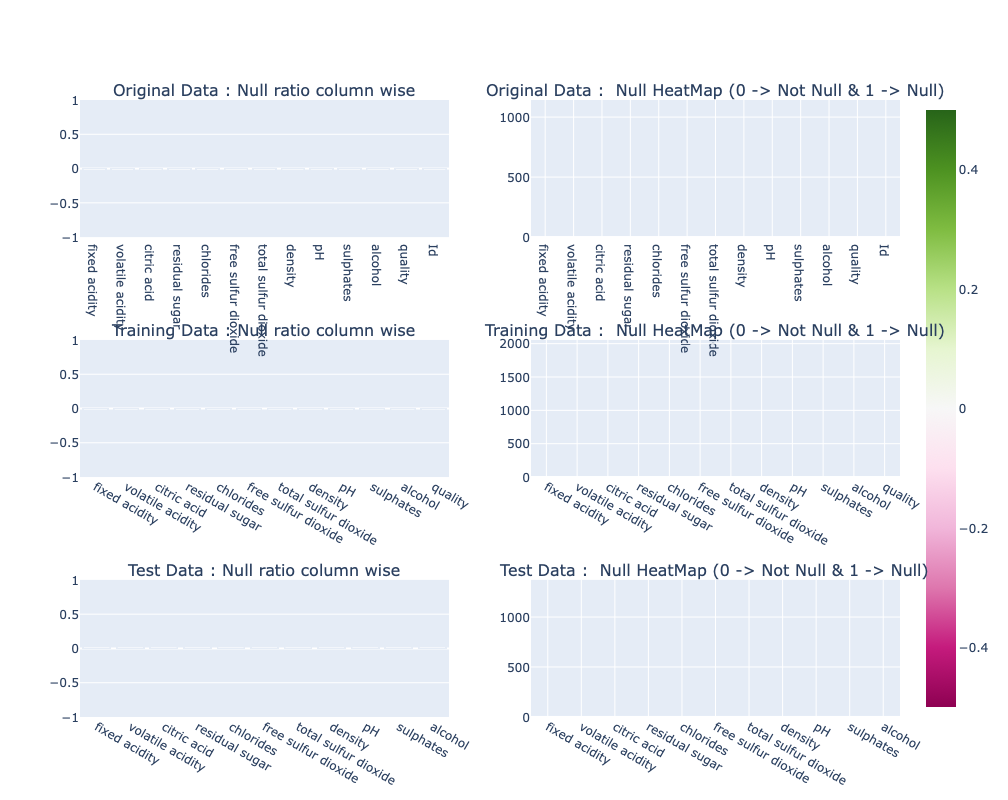

In [17]:
fig= make_subplots(rows=3,cols=2,
                  subplot_titles=(
                      "Original Data : Null ratio column wise", "Original Data :  Null HeatMap (0 -> Not Null & 1 -> Null)",
                      "Training Data : Null ratio column wise", "Training Data :  Null HeatMap (0 -> Not Null & 1 -> Null)",
                      "Test Data : Null ratio column wise", "Test Data :  Null HeatMap (0 -> Not Null & 1 -> Null)"
                                 
                                 )
                  )



temp_data= df_original.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df_original.isna().astype(np.int8)
                       ).data[0],
              row=1,col=2)

temp_data= df_train.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=2, col=1
)

fig.add_trace(px.imshow(
                        df_train.isna().astype(np.int8)
                       ).data[0],
              row=2,col=2)

temp_data= df_test.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=3, col=1
)

fig.add_trace(px.imshow(
                        df_test.isna().astype(np.int8)
                       ).data[0],
              row=3,col=2)

fig.update_layout(showlegend=False,height=900)
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> From the above plot, we see No null values present in original Dataset as well as training dataset</div>

### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#990012'> Unique Values Check</span></b>

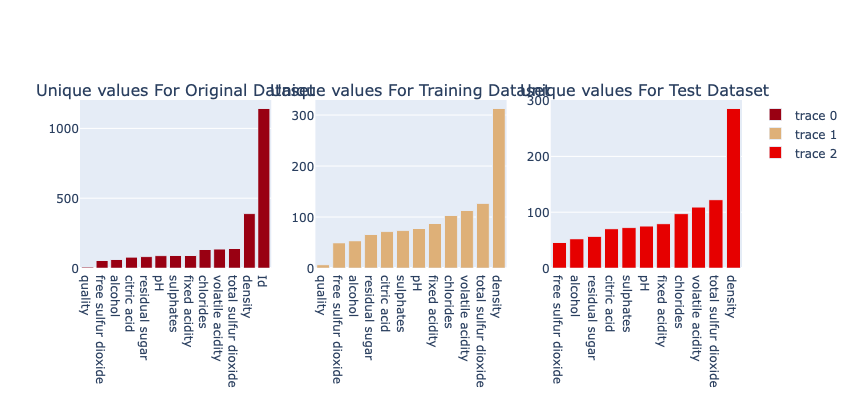

In [20]:
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Unique values For Original Dataset", "Unique values For Training Dataset","Unique values For Test Dataset"))

temp_data=df_original.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#990012')),
    row=1, col=1
)

temp_data=df_train.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

temp_data=df_test.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#e60000')),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> From the above plot, we see unique values present in original Dataset as well as training dataset is approx similliar in distribution</div>

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#990012'> Value Behaviour</span></b>

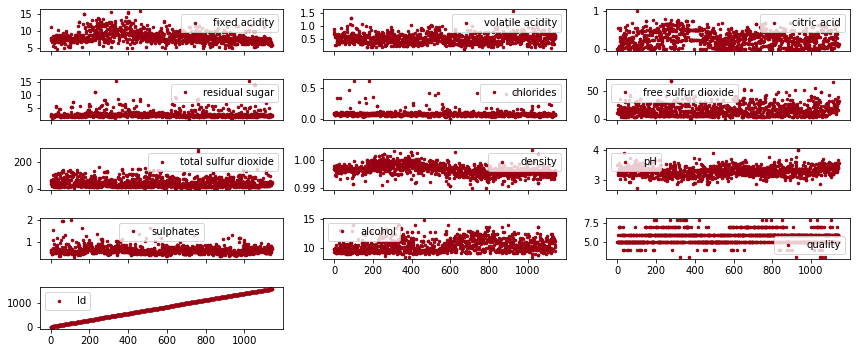

In [22]:
# For all Numerical columnn for all rows 
df_original.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#990012')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range except last column quality , quality seems to take discrete values as points apprears to be in discrete intervals</div>

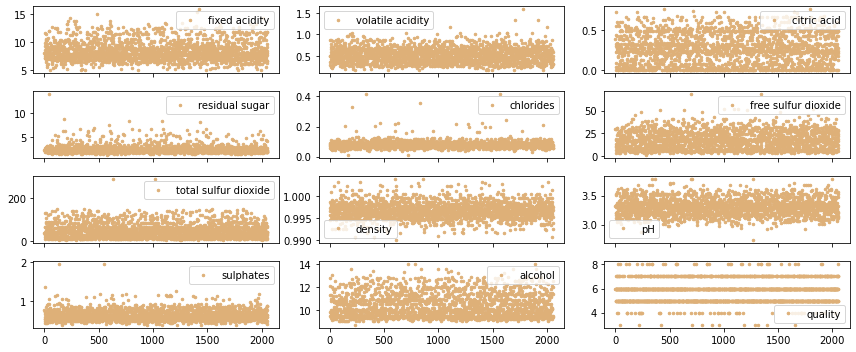

In [23]:
# For all Numerical columnn for all rows 
df_train.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#DEB078')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range except last column quality , quality seems to take discrete values as points apprears to be in discrete intervals</div>

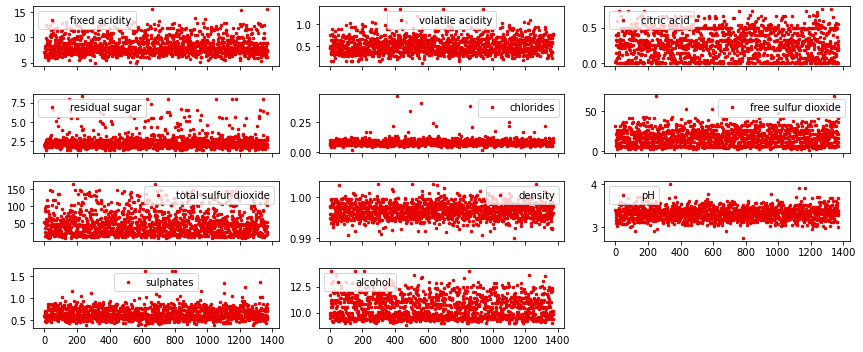

In [24]:
# For all Numerical columnn for all rows 
df_test.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#e60000')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range</div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>5 | Target Variable Analysis</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#990012'> For Original Data</span></b>

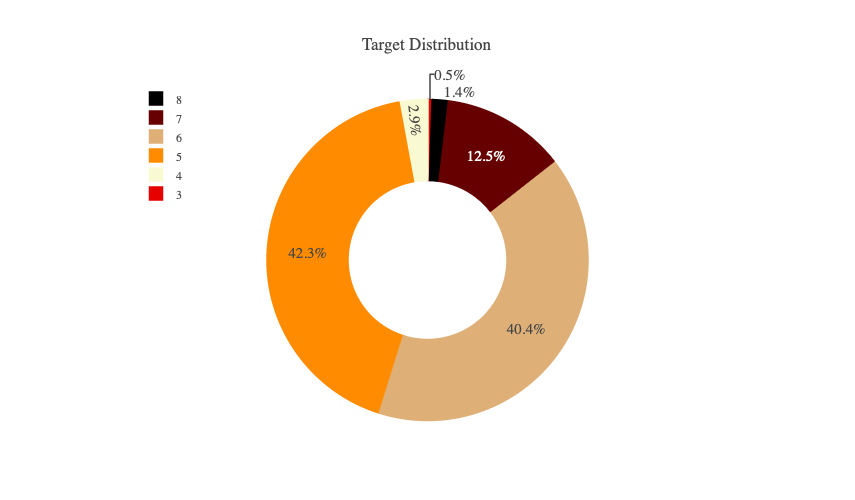

In [25]:
target=df_original[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100

pal, color=['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black'], ['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Most of the drinks have Rating 5 drinks followed by rating 6 & 7 </div>

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#990012'> For Training Data</span></b>

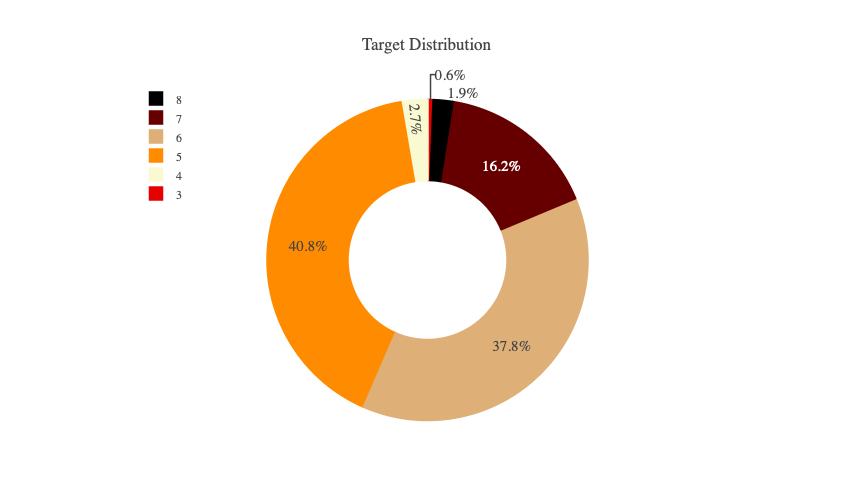

In [26]:

target=df_train[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100

pal, color=['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black'], ['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()



<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Most of the drinks have Rating 5 drinks followed by rating 6 & 7 </div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>6 | Univariate Analysis</div></b>

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#990012'> Summary for Columns (Describe)</span></b>

In [27]:
df_original.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [28]:
df_train.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2056.000000       2056.000000  2056.000000     2056.000000   
mean        8.365175          0.527601     0.265058        2.398881   
std         1.705390          0.173164     0.188267        0.858824   
min         5.000000          0.180000     0.000000        1.200000   
25%         7.200000          0.390000     0.090000        1.900000   
50%         7.950000          0.520000     0.250000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     0.760000       14.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2056.000000          2056.000000           2056.000000  2056.000000   
mean      0.081856            16.955982             49.236868     0.996748   
std       0.023729            10.009710             32.961141     0.001827   
min       0.012000             1.000000              7.000000     0.990070   
25%       0.071000             8.000000             22.000000     0.995600   
50%       0.079000            16.000000             44.000000     0.996700   
75%       0.090000            24.000000             65.000000     0.997800   
max       0.414000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  2056.000000  2056.000000  2056.000000  2056.000000  
mean      3.310569     0.641308    10.414972     5.720817  
std       0.142321     0.137942     1.028825     0.853146  
min       2.740000     0.390000     8.700000     3.000000  
25%       3.200000     0.550000     9.500000     5.000000  
50%       3.310000     0.610000    10.100000     6.000000  
75%       3.390000     0.720000    11.000000     6.000000  
max       3.780000     1.950000    14.000000     8.000000

In [29]:
df_test.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1372.000000       1372.000000  1372.000000     1372.000000   
mean        8.369606          0.524311     0.270569        2.415926   
std         1.664694          0.176942     0.185731        0.921155   
min         4.900000          0.120000     0.000000        1.300000   
25%         7.100000          0.390000     0.110000        2.000000   
50%         7.900000          0.500000     0.260000        2.200000   
75%         9.100000          0.635000     0.420000        2.500000   
max        15.600000          1.330000     0.760000        8.300000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1372.000000          1372.000000           1372.000000  1372.000000   
mean      0.081307            17.162536             49.089286     0.996670   
std       0.026566             9.974082             32.803721     0.001822   
min       0.012000             1.000000              8.000000     0.990070   
25%       0.070000             8.000000             23.000000     0.995380   
50%       0.078000            16.000000             43.000000     0.996600   
75%       0.087000            24.000000             66.000000     0.997800   
max       0.467000            68.000000            165.000000     1.003200   

                pH    sulphates      alcohol  
count  1372.000000  1372.000000  1372.000000  
mean      3.312223     0.647267    10.473081  
std       0.141405     0.134792     1.027170  
min       2.740000     0.390000     8.800000  
25%       3.210000     0.550000     9.600000  
50%       3.310000     0.620000    10.200000  
75%       3.390000     0.730000    11.200000  
max       4.010000     1.620000    14.000000

### <b><span style='color:#DEB078'>6.2 |</span><span style='color:#990012'> Individual Column Shape </span></b>

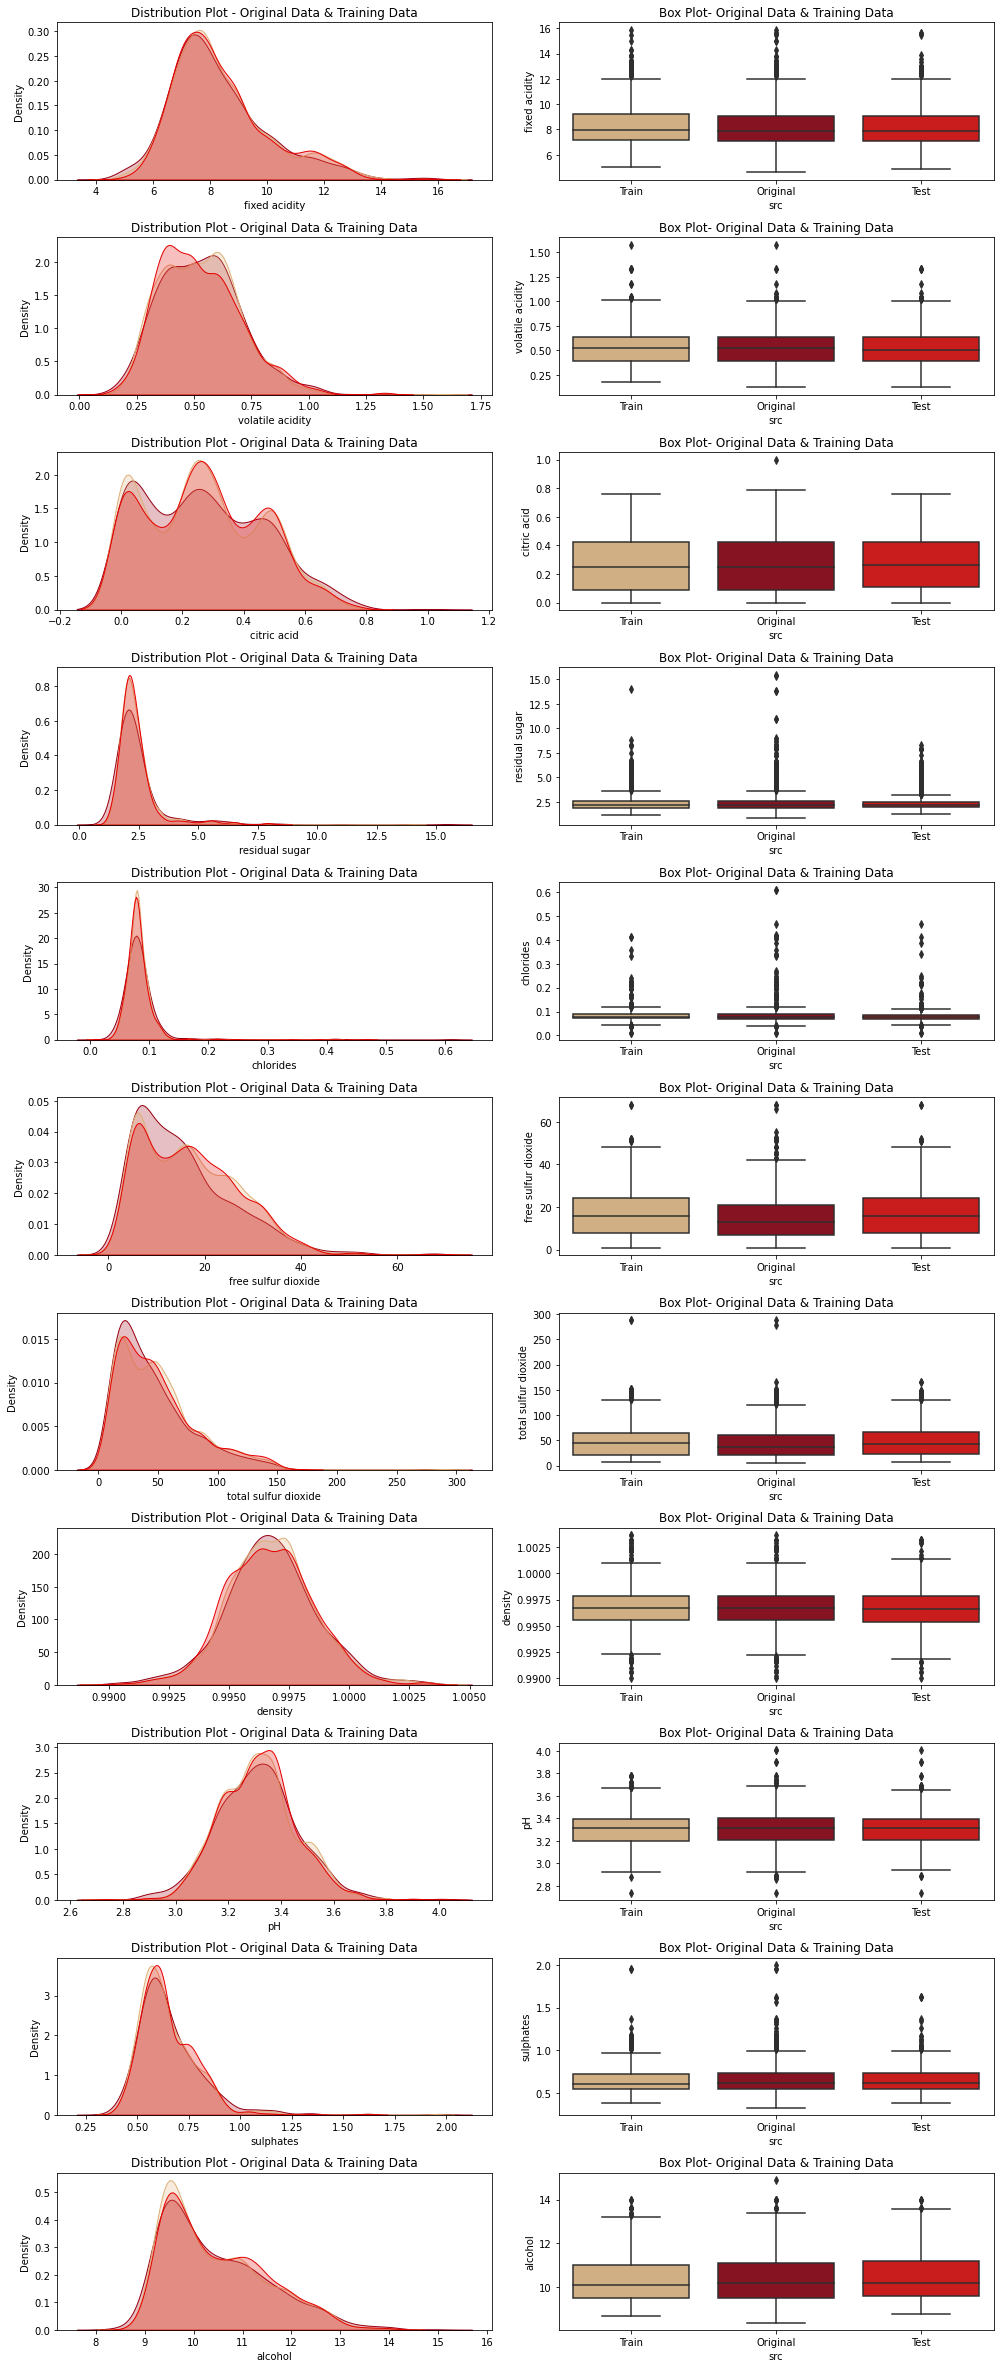

In [30]:
ncols = 2
cont_features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

nrows = len(cont_features)
df_temp=pd.concat([df_train.assign(src='Train'),df_original.assign(src='Original'),df_test.assign(src='Test')])
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 3*nrows))

for r in range(nrows):
    row = cont_features[r]
   
    sns.kdeplot(x=df_original[row], ax=axes[r,0], color='#990012', label='Test data', fill =True)
    sns.kdeplot(x=df_train[row], ax=axes[r,0], color='#DEB078', label='Train data' , fill =True )
    sns.kdeplot(x=df_test[row], ax=axes[r,0], color='#e60000', label='Test data', fill =True)
    
    sns.boxplot(data=df_temp, y=row,x='src' ,ax=axes[r,1],palette=['#DEB078','#990012','#e60000'])


    axes[r,0].title.set_text("Distribution Plot - Original Data & Training Data")
    axes[r,1].title.set_text("Box Plot- Original Data & Training Data")
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Distribution is almost overlapping for all three dataset , we can combine original dataset with train dataset for training</div>

### <b><span style='color:#DEB078'>6.3 |</span><span style='color:#990012'> Individual Column Value Observation (Outlier using IQR)</span></b>

In [31]:
upper_org =df_original.quantile(0.75)+1.5 *(df_original.quantile(0.75)-df_original.quantile(0.25))
lower_org = df_original.quantile(0.25)-1.5 *(df_original.quantile(0.75)-df_original.quantile(0.25))

upper_train =df_train.quantile(0.75)+1.5 *(df_train.quantile(0.75)-df_train.quantile(0.25))
lower_train = df_train.quantile(0.25)-1.5 *(df_train.quantile(0.75)-df_train.quantile(0.25))

upper_test =df_test.quantile(0.75)+1.5 *(df_test.quantile(0.75)-df_test.quantile(0.25))
lower_test = df_test.quantile(0.25)-1.5 *(df_test.quantile(0.75)-df_test.quantile(0.25))




columns_to_be_checked=cont_features

for i in columns_to_be_checked:

    
    print('\nColumn -> ',i,'\n')
    
    x= df_original[ (df_original[i]<round(lower_org[i],2)) |  (df_original[i]>round(upper_org[i],2))][i].to_list()
    print('Skewness -> ',round(df_original[i].skew(),3) ,' | Outliers presesnt in Original Dataset -> ',len(x),'  Out of Total -> ',len(df_original))
          
    x= df_train[ (df_train[i]<round(lower_train[i],2)) |  (df_train[i]>round(upper_train[i],2))][i].to_list()
    print('Skewness -> ',round(df_train[i].skew(),3) ,' | Outliers presesnt in Training Dataset -> ',len(x),'  Out of Total -> ',len(df_train))
          
    x= df_test[ (df_test[i]<round(lower_test[i],2)) |  (df_test[i]>round(upper_test[i],2))][i].to_list()
    print('Skewness -> ',round(df_test[i].skew(),3) ,' | Outliers presesnt in Test Dataset -> ',len(x),'  Out of Total -> ',len(df_test))
          
          
    print('\n','*'*10)


Column ->  fixed acidity 

Skewness ->  1.045  | Outliers presesnt in Original Dataset ->  44   Out of Total ->  1143
Skewness ->  0.96  | Outliers presesnt in Training Dataset ->  79   Out of Total ->  2056
Skewness ->  0.998  | Outliers presesnt in Test Dataset ->  47   Out of Total ->  1372

 **********

Column ->  volatile acidity 

Skewness ->  0.682  | Outliers presesnt in Original Dataset ->  14   Out of Total ->  1143
Skewness ->  0.668  | Outliers presesnt in Training Dataset ->  15   Out of Total ->  2056
Skewness ->  0.751  | Outliers presesnt in Test Dataset ->  15   Out of Total ->  1372

 **********

Column ->  citric acid 

Skewness ->  0.372  | Outliers presesnt in Original Dataset ->  1   Out of Total ->  1143
Skewness ->  0.247  | Outliers presesnt in Training Dataset ->  0   Out of Total ->  2056
Skewness ->  0.212  | Outliers presesnt in Test Dataset ->  0   Out of Total ->  1372

 **********

Column ->  residual sugar 

Skewness ->  4.361  | Outliers presesnt in O

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>7 | Combining Data and Relationship matrix</div></b>

### <b><span style='color:#DEB078'>7.1 |</span><span style='color:#990012'> Combining Original and Training Data</span></b>

In [32]:
df_combined=pd.concat([df_train.assign(src='Train'),df_original.assign(src='Original'),df_test.assign(src='Test')]).reset_index(drop=True)

### <b><span style='color:#DEB078'>7.2 |</span><span style='color:#990012'> Creating Relation Matrix and Graph For Combined Training Data</span></b>

In [33]:
temp_corr_combined=df_combined.corr()
temp_corr_combined

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.305292     0.689285   
volatile acidity          -0.305292          1.000000    -0.579990   
citric acid                0.689285         -0.579990     1.000000   
residual sugar             0.181816         -0.044175     0.149280   
chlorides                  0.139525          0.044193     0.176757   
free sulfur dioxide       -0.216270          0.040682    -0.153647   
total sulfur dioxide      -0.125331          0.089804    -0.057519   
density                    0.624040         -0.051708     0.378089   
pH                        -0.663327          0.251620    -0.549509   
sulphates                  0.152235         -0.317769     0.289485   
alcohol                   -0.034968         -0.220176     0.099539   
quality                    0.091092         -0.285484     0.176236   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.181816   0.139525            -0.216270   
volatile acidity           -0.044175   0.044193             0.040682   
citric acid                 0.149280   0.176757            -0.153647   
residual sugar              1.000000   0.073637             0.002972   
chlorides                   0.073637   1.000000            -0.025855   
free sulfur dioxide         0.002972  -0.025855             1.000000   
total sulfur dioxide        0.046444   0.017812             0.641432   
density                     0.286201   0.229813            -0.059082   
pH                         -0.099500  -0.177872             0.115818   
sulphates                   0.025083   0.192171            -0.043912   
alcohol                     0.067915  -0.167722            -0.103855   
quality                     0.032871  -0.082893            -0.058752   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.125331  0.624040 -0.663327   0.152235   
volatile acidity                  0.089804 -0.051708  0.251620  -0.317769   
citric acid                      -0.057519  0.378089 -0.549509   0.289485   
residual sugar                    0.046444  0.286201 -0.099500   0.025083   
chlorides                         0.017812  0.229813 -0.177872   0.192171   
free sulfur dioxide               0.641432 -0.059082  0.115818  -0.043912   
total sulfur dioxide              1.000000  0.102026 -0.030414  -0.108204   
density                           0.102026  1.000000 -0.367937   0.042258   
pH                               -0.030414 -0.367937  1.000000  -0.095123   
sulphates                        -0.108204  0.042258 -0.095123   1.000000   
alcohol                          -0.291694 -0.402174  0.142414   0.198292   
quality                          -0.208935 -0.160544 -0.008851   0.318649   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.034968  0.091092 -0.275826  
volatile acidity     -0.220176 -0.285484 -0.007892  
citric acid           0.099539  0.176236 -0.139011  
residual sugar        0.067915  0.032871 -0.046344  
chlorides            -0.167722 -0.082893 -0.088099  
free sulfur dioxide  -0.103855 -0.058752  0.095268  
total sulfur dioxide -0.291694 -0.208935 -0.107389  
density              -0.402174 -0.160544 -0.363926  
pH                    0.142414 -0.008851  0.132904  
sulphates             0.198292  0.318649 -0.103954  
alcohol               1.000000  0.482102  0.238087  
quality               0.482102  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

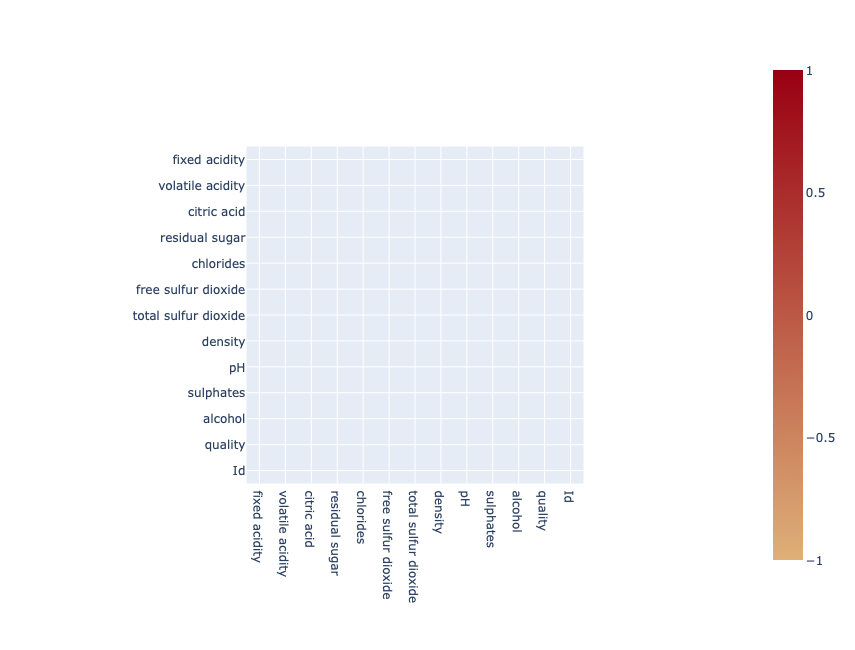

In [34]:
fig = px.imshow(df_combined.corr(method='spearman').round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#DEB078','#990012'])
fig.show()

### <b><span style='color:#DEB078'>7.3 |</span><span style='color:#990012'> Creating Relation Matrix and Graph For Test Data</span></b>

In [35]:
temp_corr_test=df_combined.corr()
temp_corr_test

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.305292     0.689285   
volatile acidity          -0.305292          1.000000    -0.579990   
citric acid                0.689285         -0.579990     1.000000   
residual sugar             0.181816         -0.044175     0.149280   
chlorides                  0.139525          0.044193     0.176757   
free sulfur dioxide       -0.216270          0.040682    -0.153647   
total sulfur dioxide      -0.125331          0.089804    -0.057519   
density                    0.624040         -0.051708     0.378089   
pH                        -0.663327          0.251620    -0.549509   
sulphates                  0.152235         -0.317769     0.289485   
alcohol                   -0.034968         -0.220176     0.099539   
quality                    0.091092         -0.285484     0.176236   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.181816   0.139525            -0.216270   
volatile acidity           -0.044175   0.044193             0.040682   
citric acid                 0.149280   0.176757            -0.153647   
residual sugar              1.000000   0.073637             0.002972   
chlorides                   0.073637   1.000000            -0.025855   
free sulfur dioxide         0.002972  -0.025855             1.000000   
total sulfur dioxide        0.046444   0.017812             0.641432   
density                     0.286201   0.229813            -0.059082   
pH                         -0.099500  -0.177872             0.115818   
sulphates                   0.025083   0.192171            -0.043912   
alcohol                     0.067915  -0.167722            -0.103855   
quality                     0.032871  -0.082893            -0.058752   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.125331  0.624040 -0.663327   0.152235   
volatile acidity                  0.089804 -0.051708  0.251620  -0.317769   
citric acid                      -0.057519  0.378089 -0.549509   0.289485   
residual sugar                    0.046444  0.286201 -0.099500   0.025083   
chlorides                         0.017812  0.229813 -0.177872   0.192171   
free sulfur dioxide               0.641432 -0.059082  0.115818  -0.043912   
total sulfur dioxide              1.000000  0.102026 -0.030414  -0.108204   
density                           0.102026  1.000000 -0.367937   0.042258   
pH                               -0.030414 -0.367937  1.000000  -0.095123   
sulphates                        -0.108204  0.042258 -0.095123   1.000000   
alcohol                          -0.291694 -0.402174  0.142414   0.198292   
quality                          -0.208935 -0.160544 -0.008851   0.318649   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.034968  0.091092 -0.275826  
volatile acidity     -0.220176 -0.285484 -0.007892  
citric acid           0.099539  0.176236 -0.139011  
residual sugar        0.067915  0.032871 -0.046344  
chlorides            -0.167722 -0.082893 -0.088099  
free sulfur dioxide  -0.103855 -0.058752  0.095268  
total sulfur dioxide -0.291694 -0.208935 -0.107389  
density              -0.402174 -0.160544 -0.363926  
pH                    0.142414 -0.008851  0.132904  
sulphates             0.198292  0.318649 -0.103954  
alcohol               1.000000  0.482102  0.238087  
quality               0.482102  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

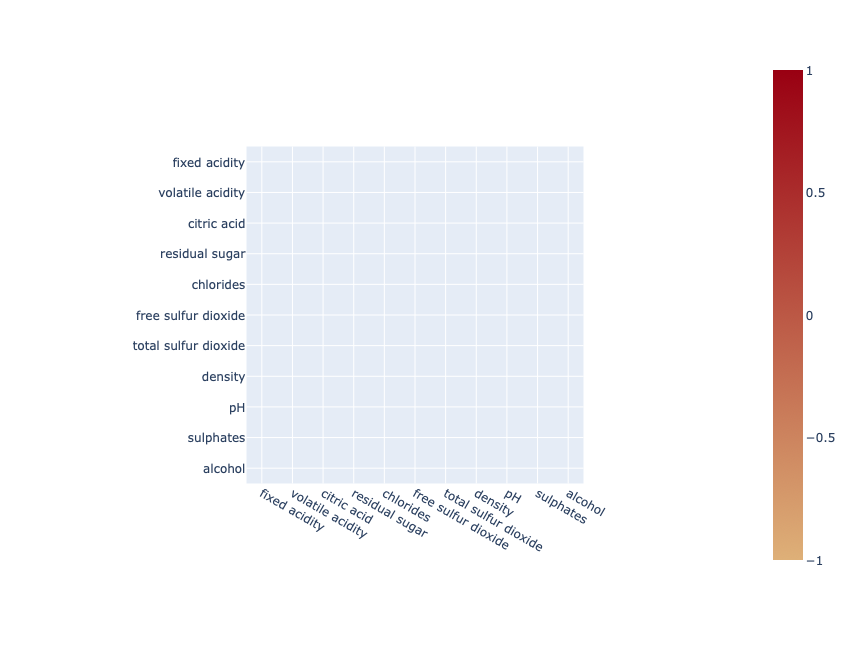

In [36]:
fig = px.imshow(df_test.corr(method='spearman').round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#DEB078','#990012'])
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Leaving Quality Column , we can see approx same relation in Combined and Test Data</div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>8 | Multivariate Analysis wrt Quality</div></b>

### <b><span style='color:#DEB078'>8.1 |</span><span style='color:#990012'> Relation with Quality in terms of corr coeficient (Combined Training and Org Data)</span></b>

In [37]:
# Used spearman since quality exhibits ordinal variable with categorical behaviours
temp_corr_score=df_combined.corr(method='spearman').loc[['quality']]
temp_corr_score

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality       0.079905         -0.300967     0.179903        0.033722   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality  -0.117695            -0.066055             -0.213565 -0.173257   

               pH  sulphates   alcohol  quality        Id  
quality  0.001892   0.433785  0.500502      1.0  0.084472

In [38]:
# Observing relationship type with corr values

temp_corr_score.drop(columns='quality',inplace=True)
strong=[]
moderate=[]
weak=[]
no_relationship=[]
for y in temp_corr_score.columns:
    p=temp_corr_score[y][0]
    if p >= 0.75 or p <= -0.75:
        strong.append(y)
    elif p >= 0.50 or p <= -0.50:
        moderate.append(y)
    elif p >= 0.25 or p <= -0.25:
        weak.append(y)
    else :
        no_relationship.append(y)

In [39]:
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  ['alcohol']

Weak ->  ['volatile acidity', 'sulphates']

No_relationship ->  ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'Id']


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> No strong relationship exist for quality , we can see 3 columns (volatile acidity, sulphates, alcohol) showing weak to moderate relationship with quality </div>

### <b><span style='color:#DEB078'>8.2 |</span><span style='color:#990012'> Relation with Quality using pairplot (Combined Training and Org Data)</span></b>

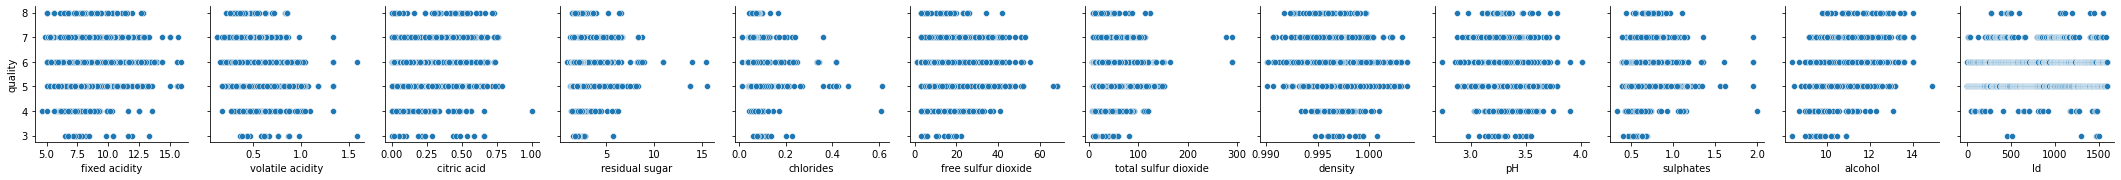

In [40]:
sns.pairplot(data=df_combined,
                  y_vars='quality',
                  x_vars=df_combined.drop(columns=['quality','src']).columns
            
)
                  
plt.show()


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  Looking at alcohol vs quality it seems drink with higher alcohol content tends to have high ratings<br>
 Looking at volatile acidity it seems drink with lower volatile acidity content tends to have higher ratings<br>
 Looking at sulphates vs quality it seems drink with higher alcohol content tends to have high ratings</div>

### <b><span style='color:#DEB078'>8.3 |</span><span style='color:#990012'> Relation with Quality using boxplot (Combined Training and Org Data)</span></b>

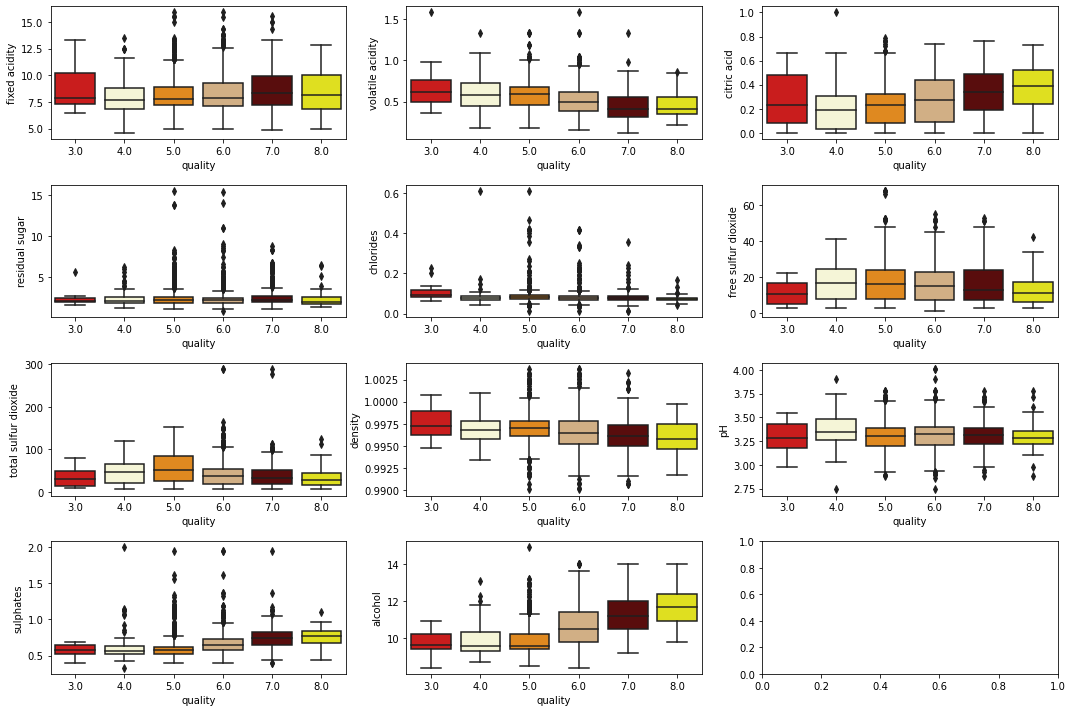

In [41]:
cont_features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

y=3
x=math.ceil(len(cont_features)/y)

plt.subplots(x,y,figsize=(15,10))

for i in range(1,len(cont_features)+1) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df_combined,y=cont_features[i-1],x='quality',palette=['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','yellow'])
plt.tight_layout()    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Median of high rating drinks is higher in sulphates, alcohol and citric acid<br>
* Median of high rating drinks is lower in chlorides, density and residual sugar 

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>9 | Multivariate Analysis leaving Quality</div></b>

### <b><span style='color:#DEB078'>9.1 |</span><span style='color:#990012'> Other Interesting Relationships For Training Data (Original & Training Data Combined)</span></b>

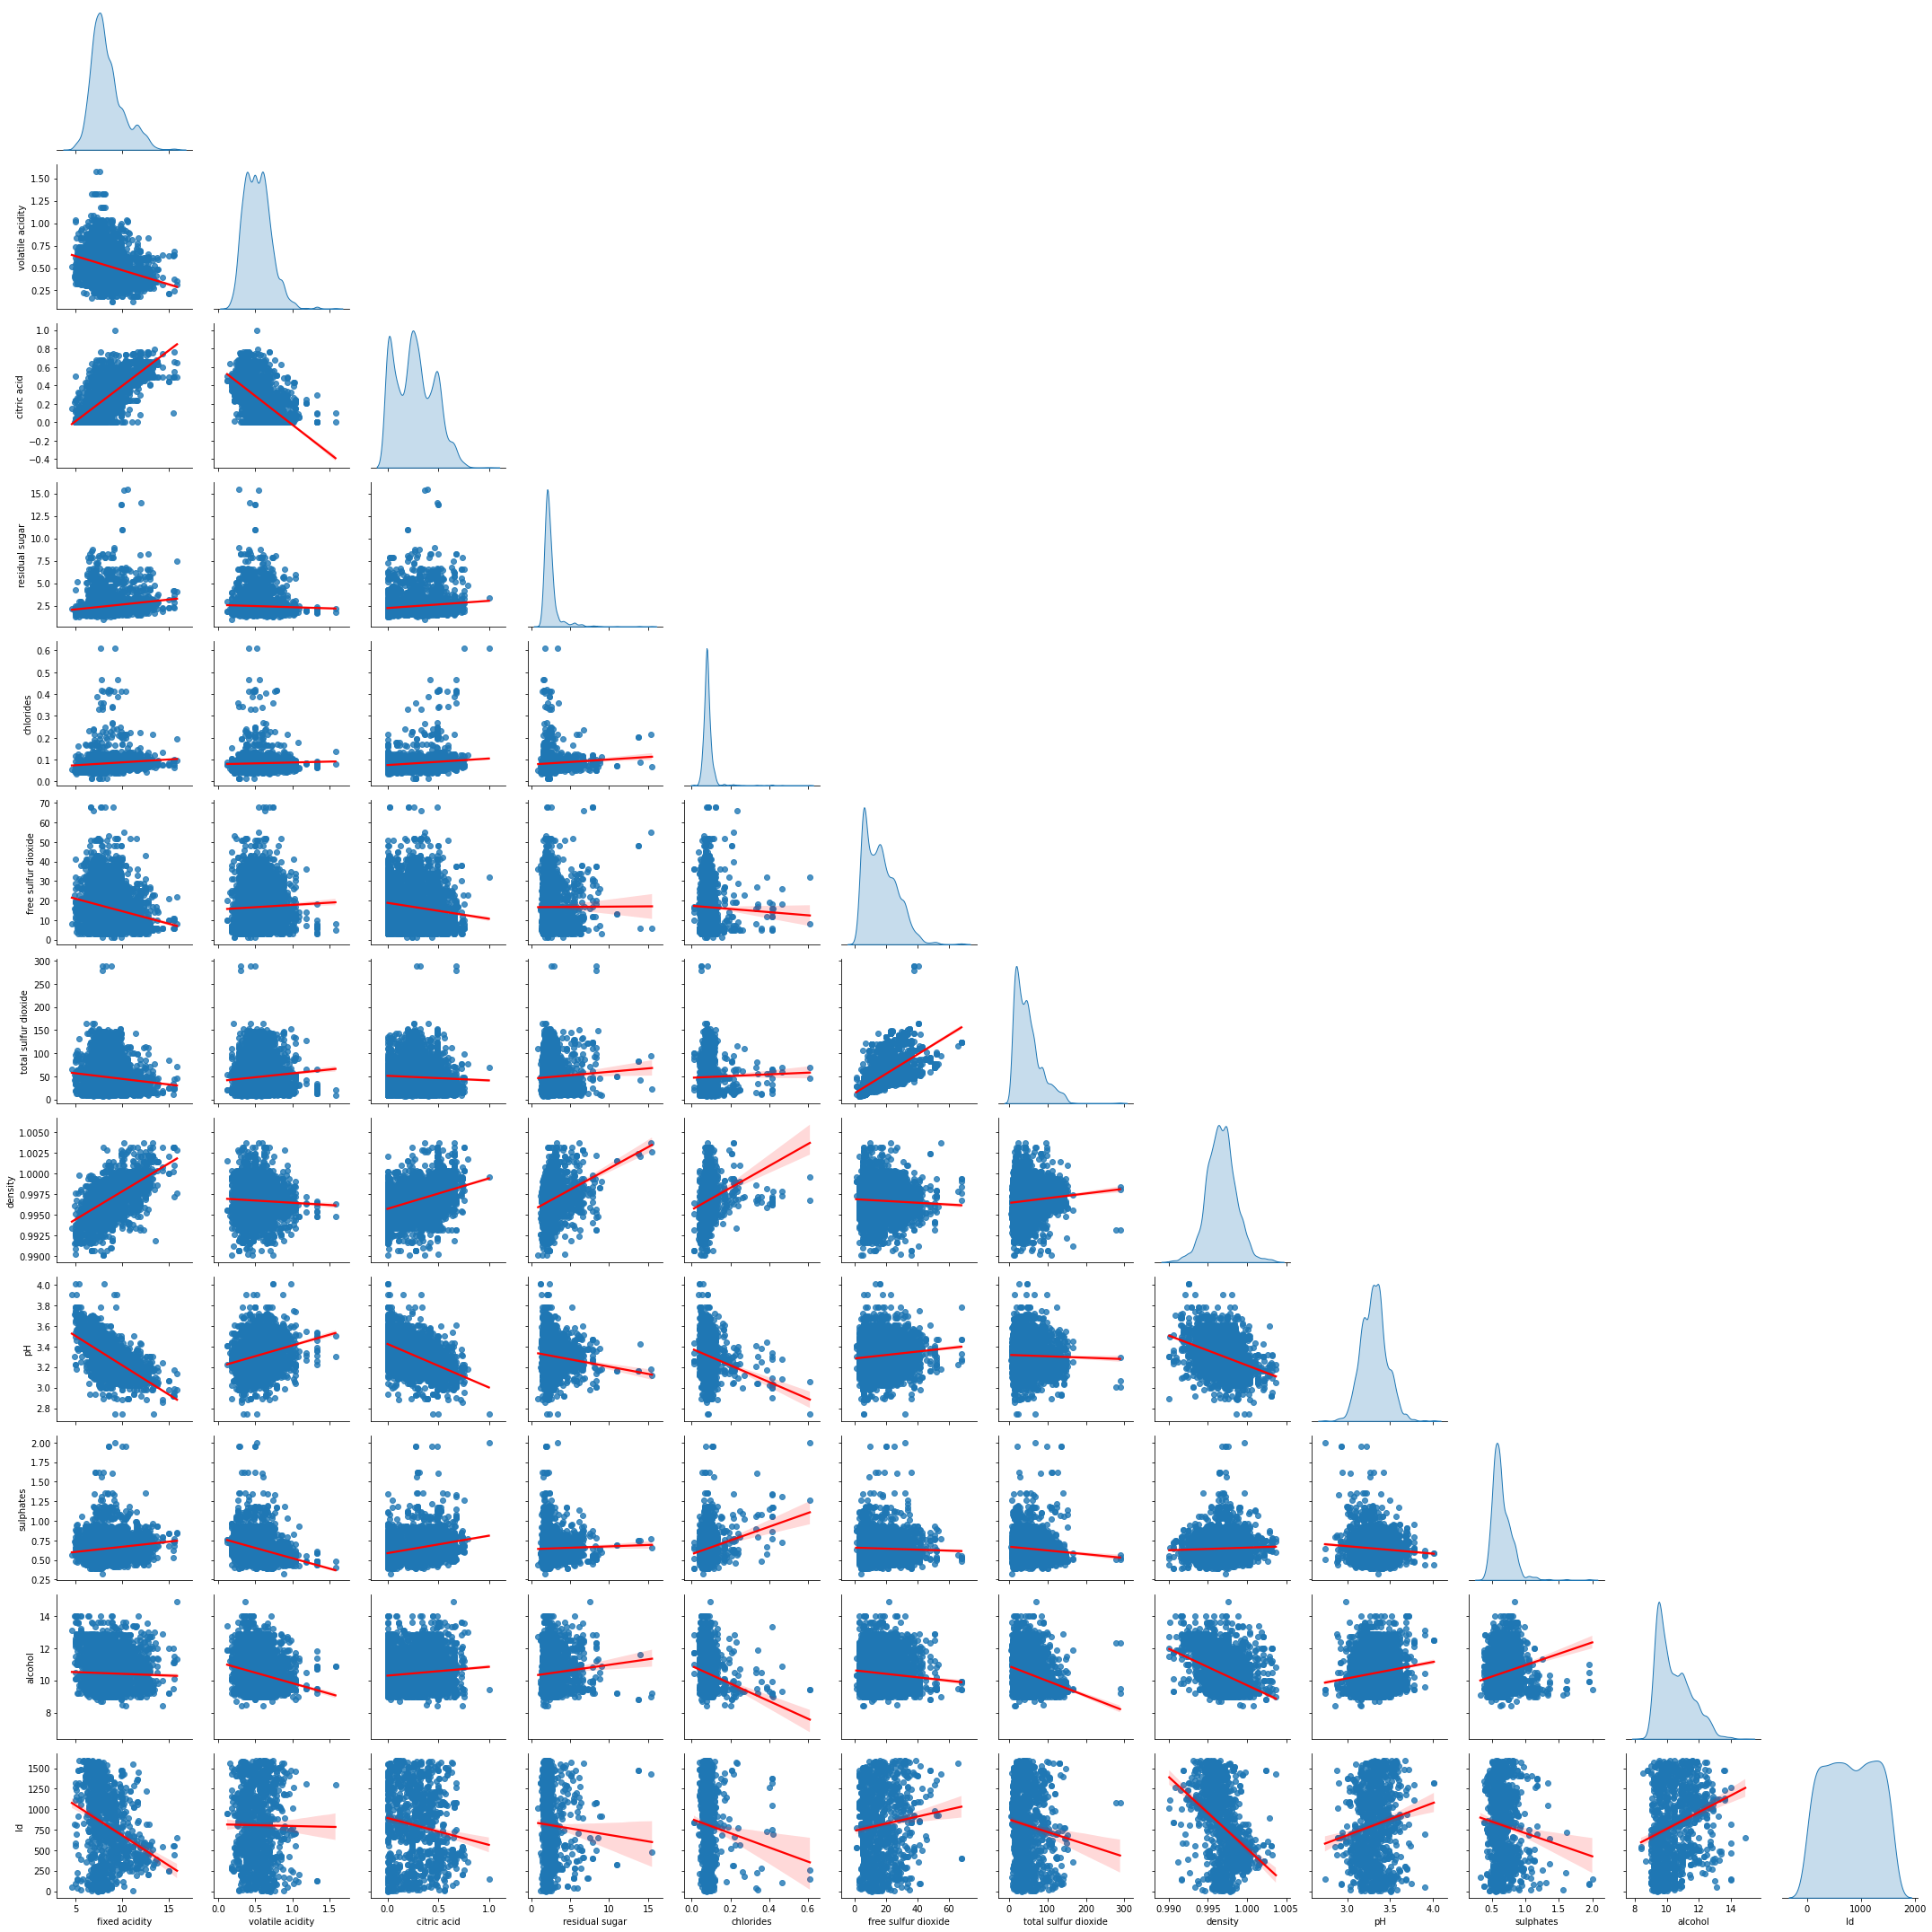

In [42]:
sns.pairplot(df_combined.drop(columns=['quality','src']),kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.tight_layout()
plt.show()

In [43]:
temp_corr=df_combined.corr()
temp_corr.drop(columns=['quality'],index=['quality'],inplace=True)
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
#print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH'), ('free sulfur dioxide', 'total sulfur dioxide')]

Weak ->  [('fixed acidity', 'volatile acidity'), ('fixed acidity', 'Id'), ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('citric acid', 'density'), ('citric acid', 'sulphates'), ('residual sugar', 'density'), ('total sulfur dioxide', 'alcohol'), ('density', 'pH'), ('density', 'alcohol'), ('density', 'Id')]


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Fixed Acidity shares moderate raltaionship with citric acid, density and pH .<br>
* volatile acidity has moderate raltaionship with citric acid.<br>
* citric acid has moderate relationship with pH.<br>
* free sulfur dioxide has moderate raltaionship with total sulfur dioxide .<br>

### <b><span style='color:#DEB078'>9.2 |</span><span style='color:#990012'> Other Interesting Relationships For Test Data</span></b>

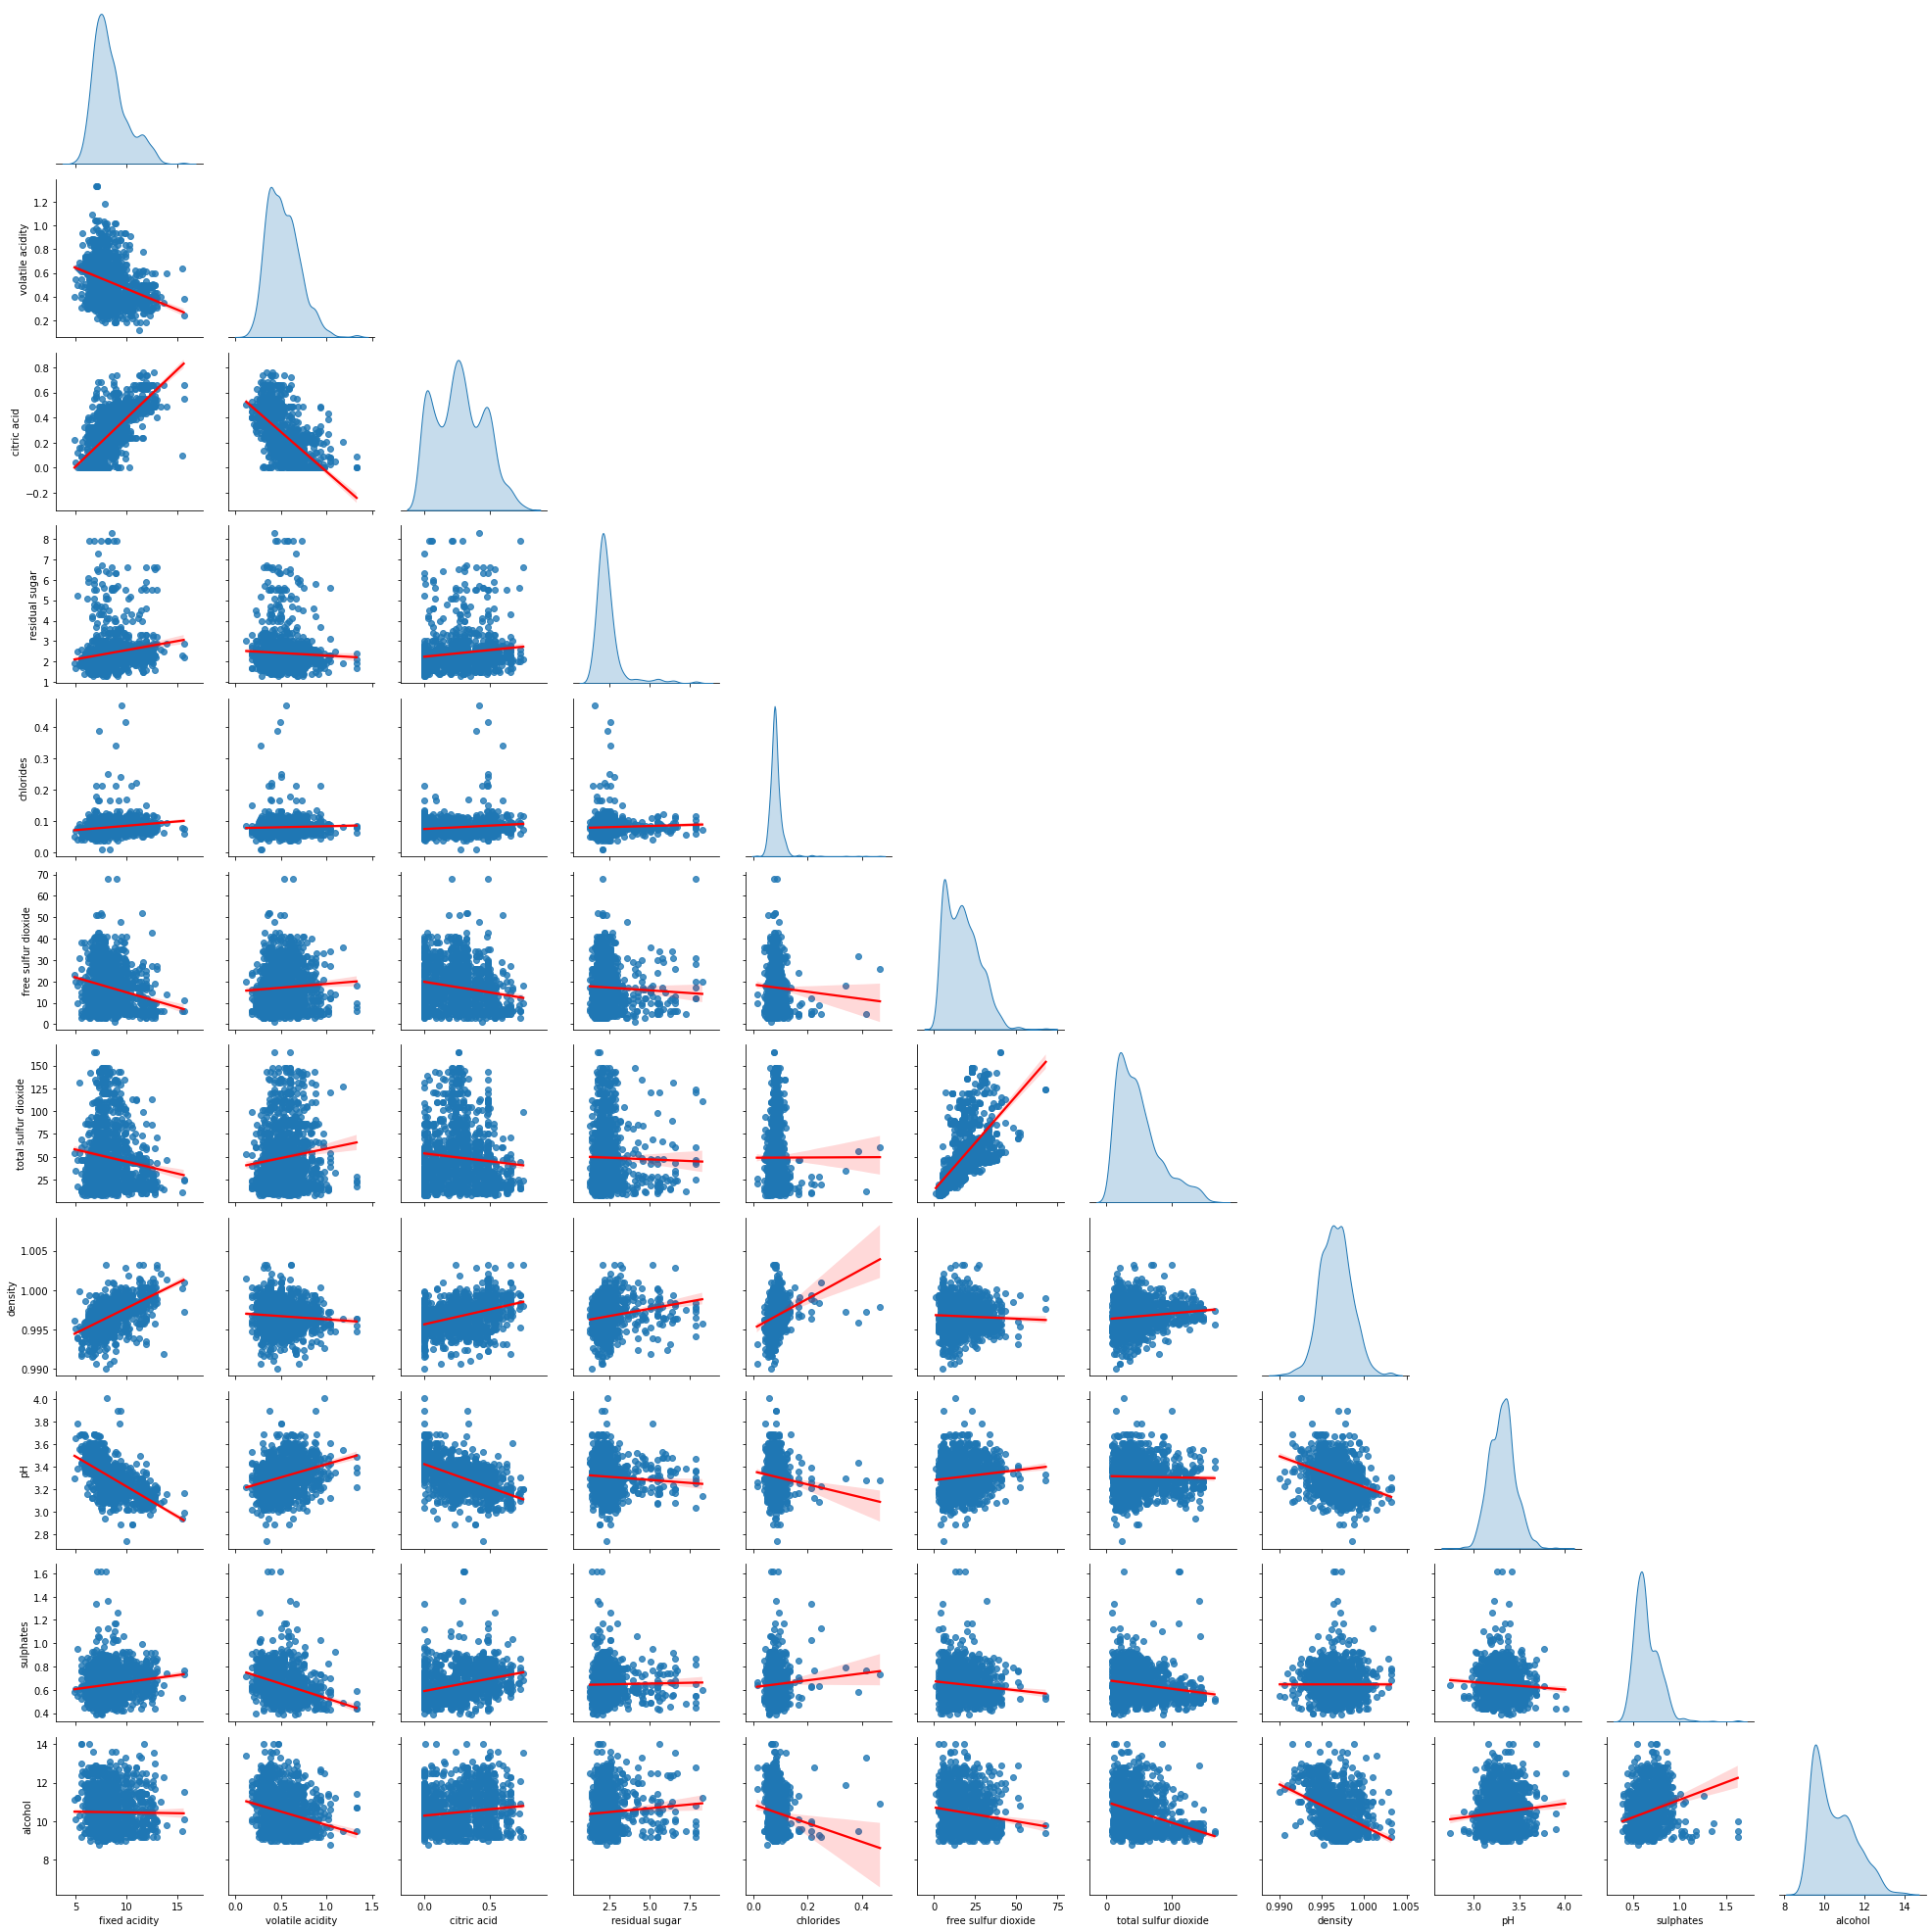

In [44]:
sns.pairplot(df_test,kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.tight_layout()
plt.show()

In [45]:
temp_corr=df_test.corr()
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
#print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH'), ('free sulfur dioxide', 'total sulfur dioxide')]

Weak ->  [('fixed acidity', 'volatile acidity'), ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('citric acid', 'density'), ('citric acid', 'sulphates'), ('chlorides', 'density'), ('total sulfur dioxide', 'alcohol'), ('density', 'pH'), ('density', 'alcohol')]


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Fixed Acidity shares moderate raltaionship with citric acid, density and pH .<br>
* volatile acidity has moderate raltaionship with citric acid.<br>
* citric acid has moderate relationship with pH.<br>
* free sulfur dioxide has moderate raltaionship with total sulfur dioxide .<br>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>10 | Analysis So Far</div></b>

* Distribution between training , test & Original data is approx same.
* Relationship between variables is similliar among test and combined data (training & Original data)

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>11 | Feature Engineering and Modelling </div></b>

* In Progress